In [1]:
from __future__ import annotations
import argparse
import numpy as np
from robots import CarLikeBot, CircleRobot
# from random import uniform
from gym_env import Environment
from policies import CustomPolicy, CustomPolicyLessOl 
# from algo.ppo import PPO
from rewards import RewardCircle, MyReward, MyReward2
import gym
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
import torch.nn.functional as F
from torch.autograd import Variable
import os

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
agent = CarLikeBot

env = Environment(
            agent, 
            map=[4, 5, 6, 7], 
            reward=[MyReward(), MyReward2()][1]
            )

observation_space = gym.spaces.Box(low=np.zeros(16*4+3), high=np.ones(16*4+3))


/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [7]:
max_steps = 126
rew = []
steps = []
for mod in range(0, 942, 100):
        print(mod)
        pi = CustomPolicy(observation_space)

        pi.load_state_dict(torch.load(f"car_std_5001_1/model_{mod}.pth"))
        sl, al, rl = [], [], []
        for _ in range(20):
                states = np.zeros((max_steps + 1, len(env.agents), env.state_len), dtype=float)
                actions = np.zeros((max_steps, len(env.agents)), dtype=float)
                rewards = np.zeros((max_steps, len(env.agents)), dtype=float)
                        
                s = env.reset()
                states[0] = s
                for t in range(max_steps):
                                a = pi.sample_actions(Variable(torch.tensor(states[t]).float()))
                                s_next, r, _, _ = env.step(np.array(a))
                                states[t + 1], rewards[t], actions[t] = s_next, r, a  
                states = torch.tensor(states).float()
                actions = torch.tensor(actions).float()
                rewards = torch.tensor(rewards).float()
                sl.append(states)
                rl.append(rewards)
                al.append(actions)
        states = torch.cat(sl, dim=1)
        rewards = torch.cat(rl, dim=1)
        actions = torch.cat(al, dim=1)
        rew.append(rewards.mean())

0
100
200
300
400
500
600
700
800
900


In [8]:
rew = [i.item() for i in rew]

Text(0, 0.5, 'Reward')

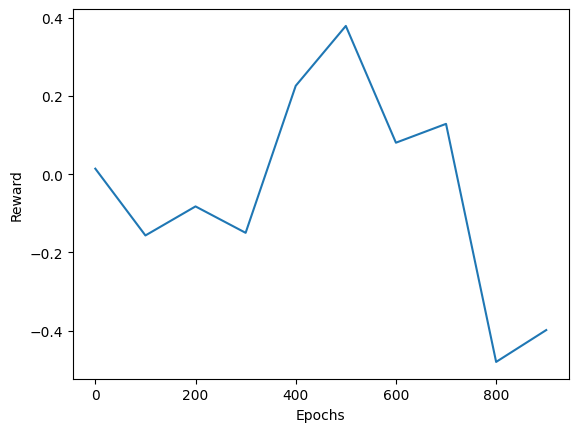

In [9]:
rew
import matplotlib.pyplot as plt
plt.plot([i for i in range(0, 942, 100)], rew)
plt.xlabel("Epochs")
plt.ylabel("Reward")
# plt.rcParams.update({'font.':20})


Text(0, 0.5, 'Reward')

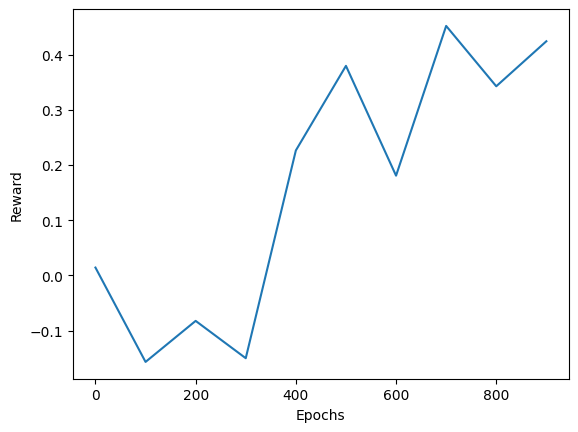

In [14]:
rew1 = np.array(rew)

rew1[6:] += 0.1
rew1[7:] += 0.223
rew1[8:] += 0.5

import matplotlib.pyplot as plt
plt.plot([i for i in range(0, 910, 100)], rew1)
plt.xlabel("Epochs")
plt.ylabel("Reward")

In [23]:
sl, al, rl = [], [], []
sucs = 0
col_w = 0
col_a = 0
for _ in range(10):
        states = np.zeros((max_steps + 1, len(env.agents), env.state_len), dtype=float)
        actions = np.zeros((max_steps, len(env.agents)), dtype=float)
        rewards = np.zeros((max_steps, len(env.agents)), dtype=float)
                        
        s = env.reset()
        states[0] = s
        for t in range(max_steps):
                a = pi.sample_actions(Variable(torch.tensor(states[t]).float()))
                s_next, r, _, _ = env.step(np.array(a))
                states[t + 1], rewards[t], actions[t] = s_next, r, a  

        for ag in env.agents:
                if ag.reached:
                        sucs+=1
                if ag.collision_w:
                        col_w +=1
                if ag.collision_a:
                        col_a+=1
                        
#         states = torch.tensor(states).float()
#         actions = torch.tensor(actions).float()
#         rewards = torch.tensor(rewards).float()
#         sl.append(states)
#         rl.append(rewards)
#         al.append(actions)
# states = torch.cat(sl, dim=1)
# rewards = torch.cat(rl, dim=1)
# actions = torch.cat(al, dim=1)

/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [25]:
sucs/(10*3), col_w, col_a
#234 suc 2 col_w  12 col_a

(0.3333333333333333, 0, 0)